<a href="https://colab.research.google.com/github/lahari2197/Computervision/blob/main/cataract_prediction_using_Xception.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install keras

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import random
from tqdm import tqdm
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/archive (4)'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Streaming output truncated to the last 5000 lines.
/content/drive/MyDrive/archive (4)/preprocessed_images/4377_right.jpg
/content/drive/MyDrive/archive (4)/preprocessed_images/4355_left.jpg
/content/drive/MyDrive/archive (4)/preprocessed_images/4347_right.jpg
/content/drive/MyDrive/archive (4)/preprocessed_images/4304_right.jpg
/content/drive/MyDrive/archive (4)/preprocessed_images/4368_right.jpg
/content/drive/MyDrive/archive (4)/preprocessed_images/4458_left.jpg
/content/drive/MyDrive/archive (4)/preprocessed_images/436_right.jpg
/content/drive/MyDrive/archive (4)/preprocessed_images/43_left.jpg
/content/drive/MyDrive/archive (4)/preprocessed_images/4431_left.jpg
/content/drive/MyDrive/archive (4)/preprocessed_images/437_right.jpg
/content/drive/MyDrive/archive (4)/preprocessed_images/4295_right.jpg
/content/drive/MyDrive/archive (4)/preprocessed_images/441_right.jpg
/content/drive/MyDrive/archive (4)/preprocessed_images/4330_left.jpg
/content/drive/MyDrive/archive (4)/preprocessed_i

In [ ]:
import numpy as np # array manipulation
import pandas as pd
from tqdm import tqdm
import keras # deep learning
from PIL import Image # Image processing

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/archive (4)/full_df.csv")

In [ ]:
def has_cataract(text):
    if "cataract" in text:
        return 1
    else:
        return 0

In [ ]:
df["left_cataract"] = df["Left-Diagnostic Keywords"].apply(lambda x: has_cataract(x))
df["right_cataract"] = df["Right-Diagnostic Keywords"].apply(lambda x: has_cataract(x))

In [ ]:
left_cataract = df.loc[(df.C ==1) & (df.left_cataract == 1)]["Left-Fundus"].values
left_cataract[:15]

array(['0_left.jpg', '81_left.jpg', '103_left.jpg', '119_left.jpg',
       '254_left.jpg', '294_left.jpg', '330_left.jpg', '448_left.jpg',
       '465_left.jpg', '477_left.jpg', '553_left.jpg', '560_left.jpg',
       '594_left.jpg', '611_left.jpg', '625_left.jpg'], dtype=object)

In [ ]:
right_cataract = df.loc[(df.C ==1) & (df.right_cataract == 1)]["Right-Fundus"].values
right_cataract[:15]

array(['24_right.jpg', '81_right.jpg', '112_right.jpg', '188_right.jpg',
       '218_right.jpg', '345_right.jpg', '354_right.jpg', '477_right.jpg',
       '553_right.jpg', '560_right.jpg', '625_right.jpg', '726_right.jpg',
       '769_right.jpg', '949_right.jpg', '955_right.jpg'], dtype=object)

In [ ]:
print("Number of images in left cataract: {}".format(len(left_cataract)))
print("Number of images in right cataract: {}".format(len(right_cataract)))

Number of images in left cataract: 304
Number of images in right cataract: 290


In [ ]:
left_normal = df.loc[(df.C ==0) & (df["Left-Diagnostic Keywords"] == "normal fundus")]["Left-Fundus"].sample(250,random_state=42).values
right_normal = df.loc[(df.C ==0) & (df["Right-Diagnostic Keywords"] == "normal fundus")]["Right-Fundus"].sample(250,random_state=42).values
right_normal[:15]

array(['2964_right.jpg', '680_right.jpg', '500_right.jpg',
       '2368_right.jpg', '2820_right.jpg', '2769_right.jpg',
       '2696_right.jpg', '2890_right.jpg', '940_right.jpg',
       '2553_right.jpg', '3371_right.jpg', '3042_right.jpg',
       '919_right.jpg', '3427_right.jpg', '379_right.jpg'], dtype=object)

In [ ]:
cataract = np.concatenate((left_cataract,right_cataract),axis=0)
normal = np.concatenate((left_normal,right_normal),axis=0)

print(len(cataract),len(normal))

594 500


In [ ]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array
dataset_dir = "/content/drive/MyDrive/archive (4)/preprocessed_images"
image_size=224
labels = []
dataset = []
def create_dataset(image_category,label):
    for img in tqdm(image_category):
        image_path = os.path.join(dataset_dir,img)
        try:
            image = cv2.imread(image_path,cv2.IMREAD_COLOR)
            image = cv2.resize(image,(image_size,image_size))
        except:
            continue

        dataset.append([np.array(image),np.array(label)])
    random.shuffle(dataset)
    return dataset

In [ ]:
dataset = create_dataset(cataract,1)

100%|██████████| 594/594 [01:15<00:00,  7.87it/s] 


In [ ]:
len(dataset)

588

In [ ]:
dataset = create_dataset(normal,0)

100%|██████████| 500/500 [02:23<00:00,  3.48it/s]


In [ ]:
len(dataset)

1088

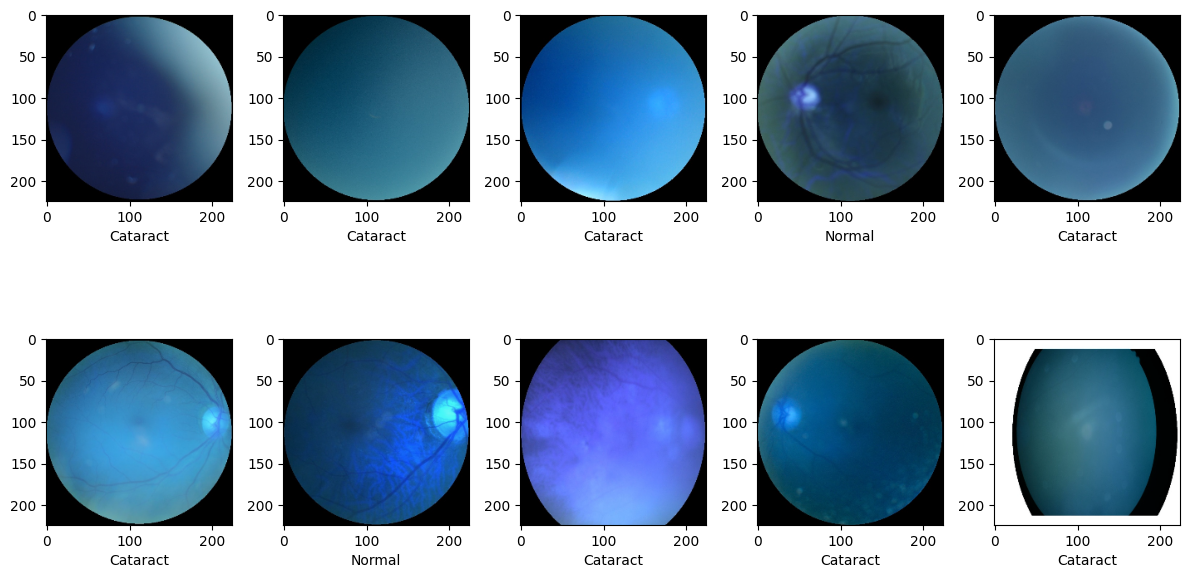

In [ ]:
plt.figure(figsize=(12,7))
for i in range(10):
    sample = random.choice(range(len(dataset)))
    image = dataset[sample][0]
    category = dataset[sample][1]
    if category== 0:
        label = "Normal"
    else:
        label = "Cataract"
    plt.subplot(2,5,i+1)
    plt.imshow(image)
    plt.xlabel(label)
plt.tight_layout()

In [ ]:
x = np.array([i[0] for i in dataset]).reshape(-1,image_size,image_size,3)
y = np.array([i[1] for i in dataset])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense, Conv2D, BatchNormalization, Dropout
from tensorflow.keras.applications import Xception

Xception = Xception(weights="imagenet", input_shape=(224, 224, 3), include_top=False, pooling=max)

for layer in Xception.layers:
    layer.trainable = False

In [ ]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Model

# Load the Xception model with pre-trained ImageNet weights, excluding the top (classification) layer
xception_model = Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3), pooling='max')

# Freeze the layers in the Xception model (optional)
for layer in xception_model.layers:
    layer.trainable = False

# Add custom classification layers on top of the Xception model
custom_model = Flatten()(xception_model.output)
custom_model = Dense(512, activation='relu')(custom_model)
custom_model = Dropout(0.5)(custom_model)
custom_model = Dense(1, activation='sigmoid')(custom_model)

# Create the final model by specifying the input and output layers
model = Model(inputs=xception_model.input, outputs=custom_model)

# Compile the model with appropriate loss, optimizer, and metrics
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the summary of the model
model.summary()


Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_9[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                           

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
checkpoint = ModelCheckpoint("Xception.h5",monitor="val_acc",verbose=1,save_best_only=True,
                             save_weights_only=False,period=1)
earlystop = EarlyStopping(monitor="val_acc",patience=5,verbose=1)

In [ ]:
history = model.fit(x_train,y_train,batch_size=16,epochs=30,validation_data=(x_test,y_test),
                    verbose=1,callbacks=[checkpoint,earlystop])

Epoch 1/30
54/55 [============================>.] - ETA: 0s - loss: 0.2230 - accuracy: 0.9213

55/55 [==============================] - 5s 87ms/step - loss: 0.2225 - accuracy: 0.9218 - val_loss: 0.1684 - val_accuracy: 0.9404
Epoch 2/30
54/55 [============================>.] - ETA: 0s - loss: 0.2116 - accuracy: 0.9259

55/55 [==============================] - 5s 85ms/step - loss: 0.2108 - accuracy: 0.9264 - val_loss: 0.1891 - val_accuracy: 0.9404
Epoch 3/30
54/55 [============================>.] - ETA: 0s - loss: 0.2168 - accuracy: 0.9178

55/55 [==============================] - 5s 86ms/step - loss: 0.2161 - accuracy: 0.9184 - val_loss: 0.1760 - val_accuracy: 0.9358
Epoch 4/30
54/55 [============================>.] - ETA: 0s - loss: 0.2189 - accuracy: 0.9167

55/55 [==============================] - 4s 78ms/step - loss: 0.2181 - accuracy: 0.9172 - val_loss: 0.2215 - val_accuracy: 0.9541
Epoch 5/30
54/55 [============================>.] - ETA: 0s - loss: 0.2152 - accuracy: 0.9213

55/55 [==============================] - 4s 79ms/step - loss: 0.2140 - accuracy: 0.9218 - val_loss: 0.2010 - val_accuracy: 0.9312
Epoch 6/30
54/55 [============================>.] - ETA: 0s - loss: 0.2276 - accuracy: 0.9225

55/55 [==============================] - 5s 89ms/step - loss: 0.2272 - accuracy: 0.9230 - val_loss: 0.1837 - val_accuracy: 0.9450
Epoch 7/30
54/55 [============================>.] - ETA: 0s - loss: 0.2201 - accuracy: 0.9144

55/55 [==============================] - 4s 80ms/step - loss: 0.2198 - accuracy: 0.9149 - val_loss: 0.1816 - val_accuracy: 0.9541
Epoch 8/30
54/55 [============================>.] - ETA: 0s - loss: 0.2486 - accuracy: 0.9097

55/55 [==============================] - 5s 88ms/step - loss: 0.2469 - accuracy: 0.9103 - val_loss: 0.2049 - val_accuracy: 0.9450
Epoch 9/30
54/55 [============================>.] - ETA: 0s - loss: 0.2126 - accuracy: 0.9306

55/55 [==============================] - 4s 82ms/step - loss: 0.2126 - accuracy: 0.9299 - val_loss: 0.2567 - val_accuracy: 0.9358
Epoch 10/30
54/55 [============================>.] - ETA: 0s - loss: 0.2801 - accuracy: 0.9005

55/55 [==============================] - 4s 79ms/step - loss: 0.2784 - accuracy: 0.9011 - val_loss: 0.2037 - val_accuracy: 0.9450
Epoch 11/30
54/55 [============================>.] - ETA: 0s - loss: 0.2489 - accuracy: 0.9086

55/55 [==============================] - 4s 79ms/step - loss: 0.2486 - accuracy: 0.9092 - val_loss: 0.2338 - val_accuracy: 0.9358
Epoch 12/30
54/55 [============================>.] - ETA: 0s - loss: 0.2869 - accuracy: 0.8947

55/55 [==============================] - 5s 88ms/step - loss: 0.2855 - accuracy: 0.8954 - val_loss: 0.2162 - val_accuracy: 0.9312
Epoch 13/30
54/55 [============================>.] - ETA: 0s - loss: 0.2217 - accuracy: 0.9039

55/55 [==============================] - 4s 79ms/step - loss: 0.2210 - accuracy: 0.9046 - val_loss: 0.2556 - val_accuracy: 0.9404
Epoch 14/30
54/55 [============================>.] - ETA: 0s - loss: 0.2149 - accuracy: 0.9086

55/55 [==============================] - 5s 87ms/step - loss: 0.2146 - accuracy: 0.9080 - val_loss: 0.2155 - val_accuracy: 0.9358
Epoch 15/30
54/55 [============================>.] - ETA: 0s - loss: 0.2378 - accuracy: 0.8912

55/55 [==============================] - 5s 88ms/step - loss: 0.2390 - accuracy: 0.8908 - val_loss: 0.1523 - val_accuracy: 0.9587
Epoch 16/30
54/55 [============================>.] - ETA: 0s - loss: 0.2521 - accuracy: 0.8866

55/55 [==============================] - 5s 87ms/step - loss: 0.2510 - accuracy: 0.8874 - val_loss: 0.1602 - val_accuracy: 0.9587
Epoch 17/30
54/55 [============================>.] - ETA: 0s - loss: 0.1677 - accuracy: 0.9352

55/55 [==============================] - 4s 78ms/step - loss: 0.1668 - accuracy: 0.9356 - val_loss: 0.2029 - val_accuracy: 0.9495
Epoch 18/30
54/55 [============================>.] - ETA: 0s - loss: 0.2237 - accuracy: 0.8981

55/55 [==============================] - 4s 78ms/step - loss: 0.2251 - accuracy: 0.8977 - val_loss: 0.2241 - val_accuracy: 0.9587
Epoch 19/30
54/55 [============================>.] - ETA: 0s - loss: 0.1951 - accuracy: 0.9190

55/55 [==============================] - 4s 77ms/step - loss: 0.1959 - accuracy: 0.9184 - val_loss: 0.1943 - val_accuracy: 0.9404
Epoch 20/30
54/55 [============================>.] - ETA: 0s - loss: 0.2512 - accuracy: 0.8877

55/55 [==============================] - 5s 85ms/step - loss: 0.2499 - accuracy: 0.8885 - val_loss: 0.1613 - val_accuracy: 0.9587
Epoch 21/30
54/55 [============================>.] - ETA: 0s - loss: 0.1858 - accuracy: 0.9144

55/55 [==============================] - 5s 86ms/step - loss: 0.1845 - accuracy: 0.9149 - val_loss: 0.2079 - val_accuracy: 0.9587
Epoch 22/30
54/55 [============================>.] - ETA: 0s - loss: 0.2575 - accuracy: 0.9005

55/55 [==============================] - 5s 86ms/step - loss: 0.2573 - accuracy: 0.9011 - val_loss: 0.3122 - val_accuracy: 0.9083
Epoch 23/30
54/55 [============================>.] - ETA: 0s - loss: 0.2476 - accuracy: 0.9190

55/55 [==============================] - 4s 77ms/step - loss: 0.2485 - accuracy: 0.9184 - val_loss: 0.2371 - val_accuracy: 0.9358
Epoch 24/30
54/55 [============================>.] - ETA: 0s - loss: 0.2701 - accuracy: 0.8889

55/55 [==============================] - 5s 87ms/step - loss: 0.2691 - accuracy: 0.8897 - val_loss: 0.2184 - val_accuracy: 0.9404
Epoch 25/30
54/55 [============================>.] - ETA: 0s - loss: 0.2291 - accuracy: 0.9097

55/55 [==============================] - 5s 85ms/step - loss: 0.2284 - accuracy: 0.9103 - val_loss: 0.1482 - val_accuracy: 0.9495
Epoch 26/30
54/55 [============================>.] - ETA: 0s - loss: 0.2243 - accuracy: 0.9109

55/55 [==============================] - 5s 86ms/step - loss: 0.2230 - accuracy: 0.9115 - val_loss: 0.1771 - val_accuracy: 0.9450
Epoch 27/30
54/55 [============================>.] - ETA: 0s - loss: 0.2281 - accuracy: 0.9051

55/55 [==============================] - 5s 88ms/step - loss: 0.2267 - accuracy: 0.9057 - val_loss: 0.1685 - val_accuracy: 0.9541
Epoch 28/30
54/55 [============================>.] - ETA: 0s - loss: 0.2121 - accuracy: 0.9167

55/55 [==============================] - 4s 77ms/step - loss: 0.2110 - accuracy: 0.9172 - val_loss: 0.1536 - val_accuracy: 0.9587
Epoch 29/30
54/55 [============================>.] - ETA: 0s - loss: 0.2078 - accuracy: 0.9155

55/55 [==============================] - 5s 85ms/step - loss: 0.2066 - accuracy: 0.9161 - val_loss: 0.1959 - val_accuracy: 0.9404
Epoch 30/30
54/55 [============================>.] - ETA: 0s - loss: 0.2199 - accuracy: 0.9097

55/55 [==============================] - 4s 79ms/step - loss: 0.2193 - accuracy: 0.9103 - val_loss: 0.1464 - val_accuracy: 0.9541


In [ ]:
loss,Accuracy= model.evaluate(x_test,y_test)
print("loss", loss)
print("Accuracy", Accuracy)

7/7 [==============================] - 1s 118ms/step - loss: 0.1464 - accuracy: 0.9541
loss 0.14642007648944855
Accuracy 0.9541284441947937


In [ ]:
!pip install scikit-learn

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [ ]:
# Obtain the predicted probability values for the test data
y_pred = model.predict(x_test)

# Convert the predicted probability values to class labels
y_pred = (y_pred > 0.5).astype(int)

7/7 [==============================] - 1s 124ms/step


In [ ]:
accuracy_score(y_test,y_pred)

0.9541284403669725

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95       100
           1       0.94      0.98      0.96       118

    accuracy                           0.95       218
   macro avg       0.96      0.95      0.95       218
weighted avg       0.96      0.95      0.95       218



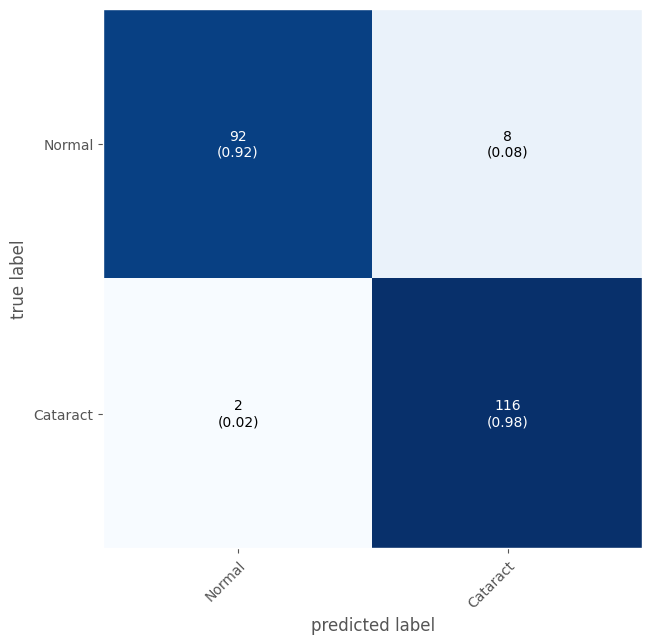

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat = cm,figsize=(8,7),class_names = ["Normal","Cataract"],
                      show_normed = True);

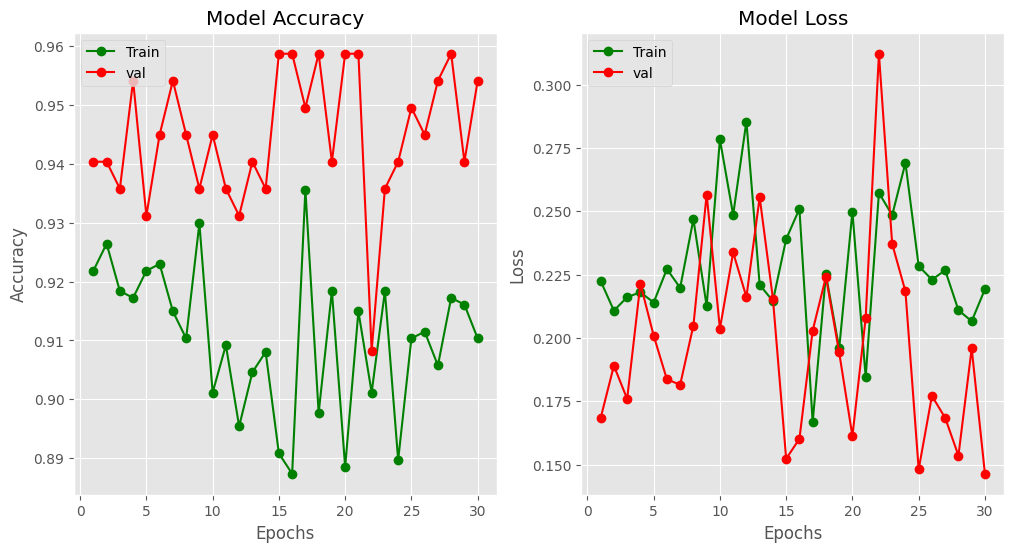

In [ ]:
plt.style.use("ggplot")
fig = plt.figure(figsize=(12,6))
epochs = range(1,31)
plt.subplot(1,2,1)
plt.plot(epochs,history.history["accuracy"],"go-")
plt.plot(epochs,history.history["val_accuracy"],"ro-")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train","val"],loc = "upper left")

plt.subplot(1,2,2)
plt.plot(epochs,history.history["loss"],"go-")
plt.plot(epochs,history.history["val_loss"],"ro-")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train","val"],loc = "upper left")
plt.show()

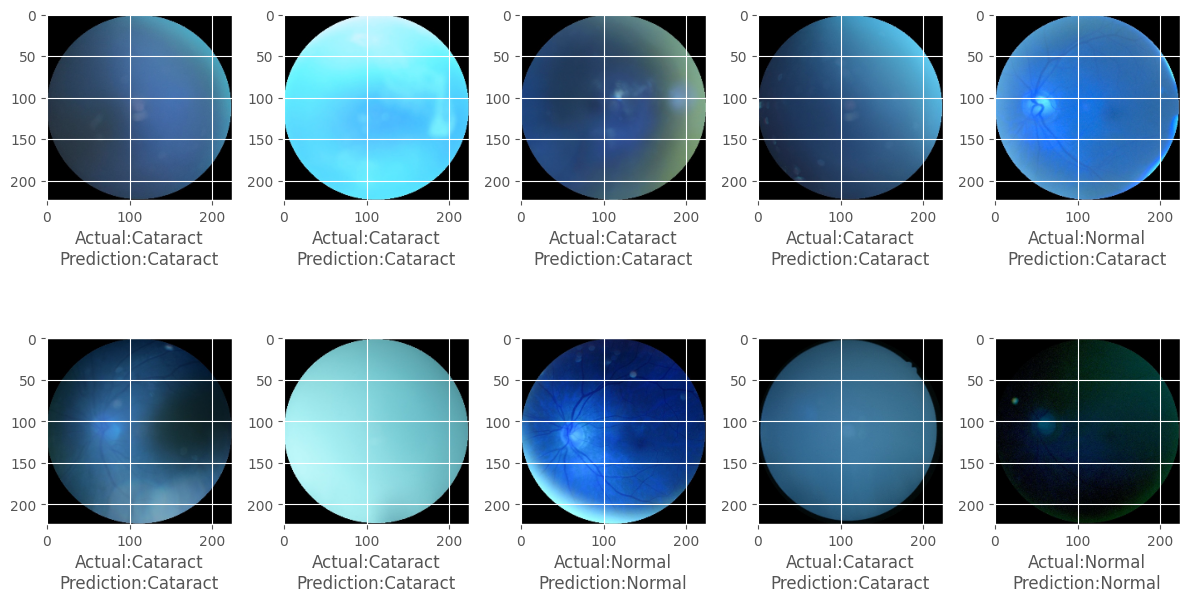

In [ ]:
plt.figure(figsize=(12,7))
for i in range(10):
    sample = random.choice(range(len(x_test)))
    image = x_test[sample]
    category = y_test[sample]
    pred_category = y_pred[sample]

    if category== 0:
        label = "Normal"
    else:
        label = "Cataract"

    if pred_category== 0:
        pred_label = "Normal"
    else:
        pred_label = "Cataract"

    plt.subplot(2,5,i+1)
    plt.imshow(image)
    plt.xlabel("Actual:{}\nPrediction:{}".format(label,pred_label))
plt.tight_layout()